In [1]:
!pip install "gluonts[mxnet,pro]"
!pip install "gluonts[torch,pro]"
!pip install yfinance


In [2]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (30, 10)})

import sys
import os

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## GlutonTs Basic Example

100%|██████████| 50/50 [00:01<00:00, 30.75it/s, epoch=5/5, avg_epoch_loss=4.02]


<AxesSubplot:>

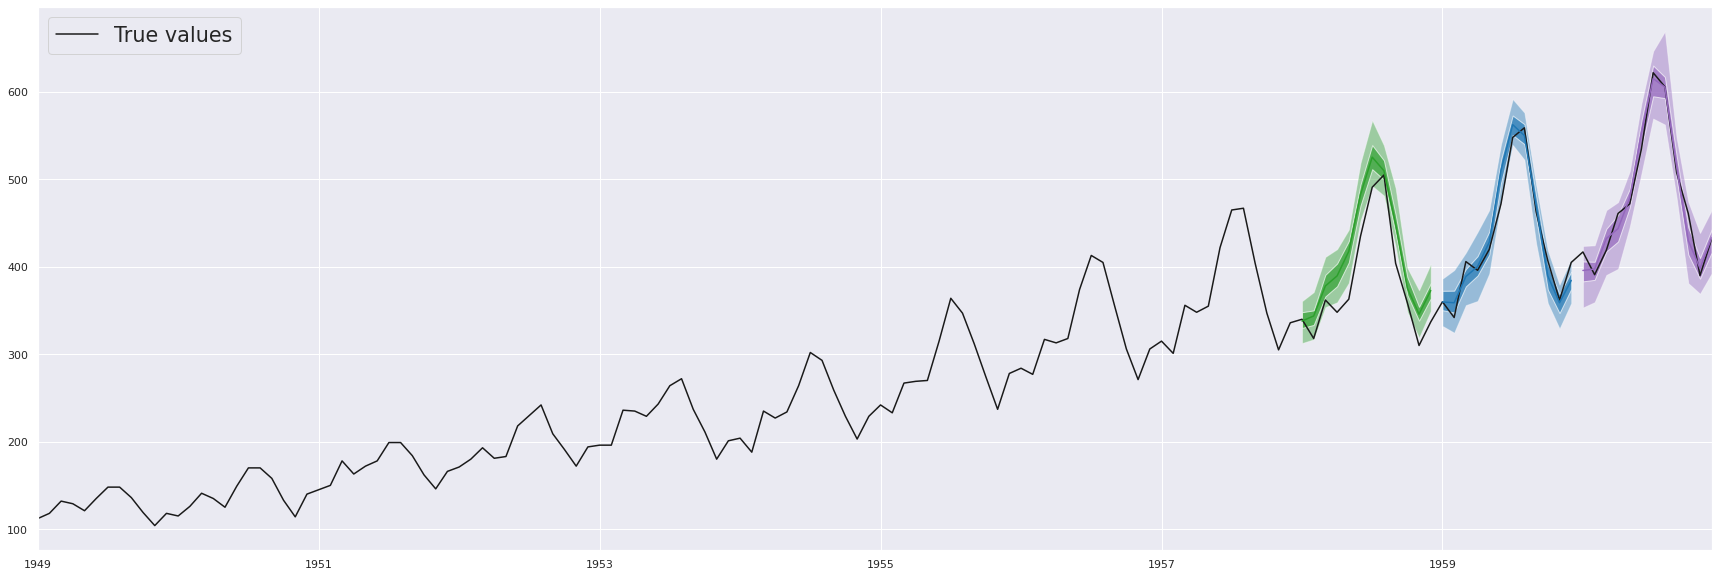

In [3]:
import matplotlib.pyplot as plt
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx import Trainer

dataset = get_dataset("airpassengers")

estimator = DeepAREstimator(prediction_length=12, freq="M", trainer=Trainer(epochs=5))
model = estimator.train(dataset.train)

# Make predictions
true_values = to_pandas(list(dataset.test)[0])
true_values.to_timestamp().plot(color="k")

prediction_input = PandasDataset([true_values[:-36], true_values[:-24], true_values[:-12]])
predictions = model.predict(prediction_input)

for color, prediction in zip(["green", "blue", "purple"], predictions):
    prediction.plot(color=f"tab:{color}")

plt.legend(["True values"], loc="upper left", fontsize="xx-large")

100%|██████████| 50/50 [00:00<00:00, 55.95it/s, epoch=5/5, avg_epoch_loss=4.96]


<AxesSubplot:>

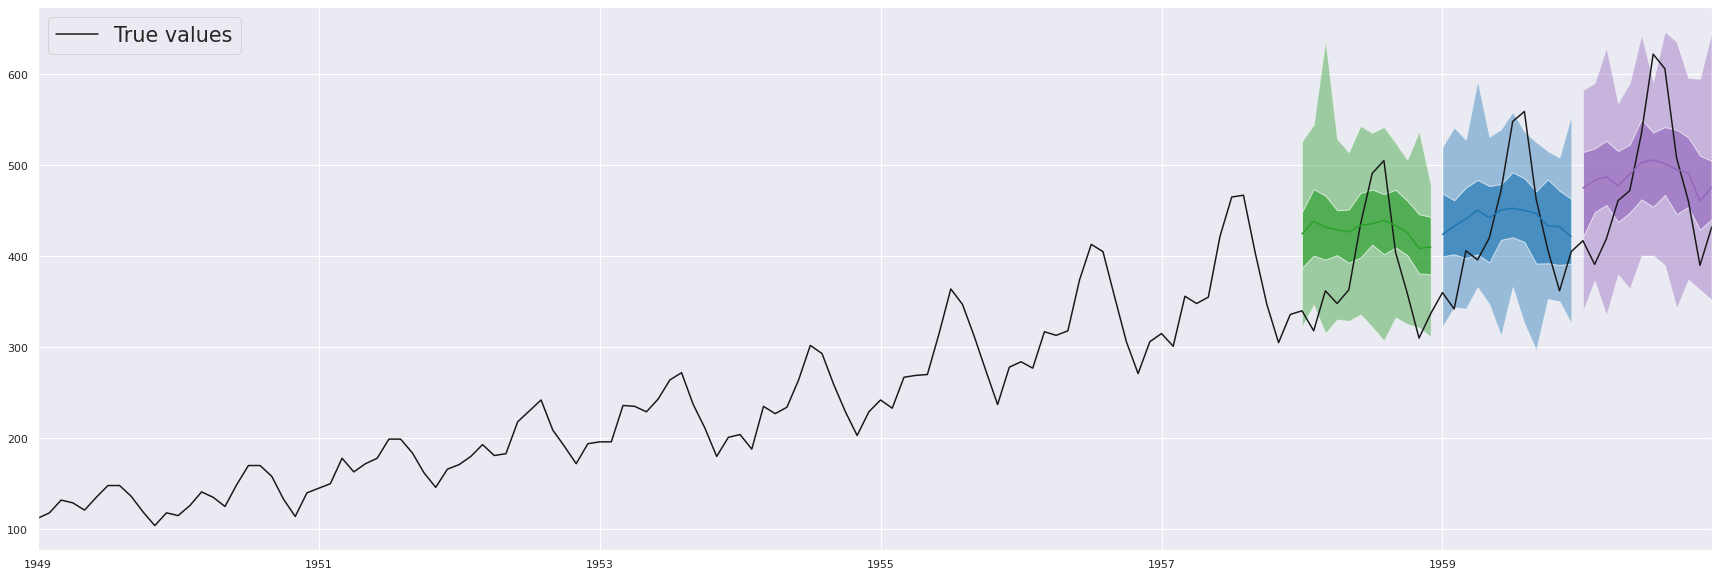

In [4]:
import matplotlib.pyplot as plt
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.model.transformer import TransformerEstimator
from gluonts.mx import Trainer

dataset = get_dataset("airpassengers")

estimator = TransformerEstimator(prediction_length=12, freq="M", trainer=Trainer(epochs=5))
model = estimator.train(dataset.train)

# Make predictions
true_values = to_pandas(list(dataset.test)[0])
true_values.to_timestamp().plot(color="k")

prediction_input = PandasDataset([true_values[:-36], true_values[:-24], true_values[:-12]])
predictions = model.predict(prediction_input)

for color, prediction in zip(["green", "blue", "purple"], predictions):
    prediction.plot(color=f"tab:{color}")

plt.legend(["True values"], loc="upper left", fontsize="xx-large")

## BTC-USD Dataset

In [5]:
df_btc_usd = yf.download("BTC-USD")
df_btc_usd.shape
df_btc_usd.dtypes
df_btc_usd.columns
df_btc_usd.head()
df_btc_usd.index

df_btc_usd = df_btc_usd.asfreq('d')
pd.infer_freq(df_btc_usd.asfreq('d').index)

[*********************100%***********************]  1 of 1 completed


(2941, 6)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05'],
              dtype='datetime64[ns]', name='Date', length=2941, freq=None)

'D'

In [6]:
# keep only CLose column
df_btc_usd = pd.DataFrame(df_btc_usd['Close'])
df_btc_usd = df_btc_usd[df_btc_usd.index > '2021-01-01']
df_btc_usd.shape

(642, 1)

<AxesSubplot:xlabel='Date'>

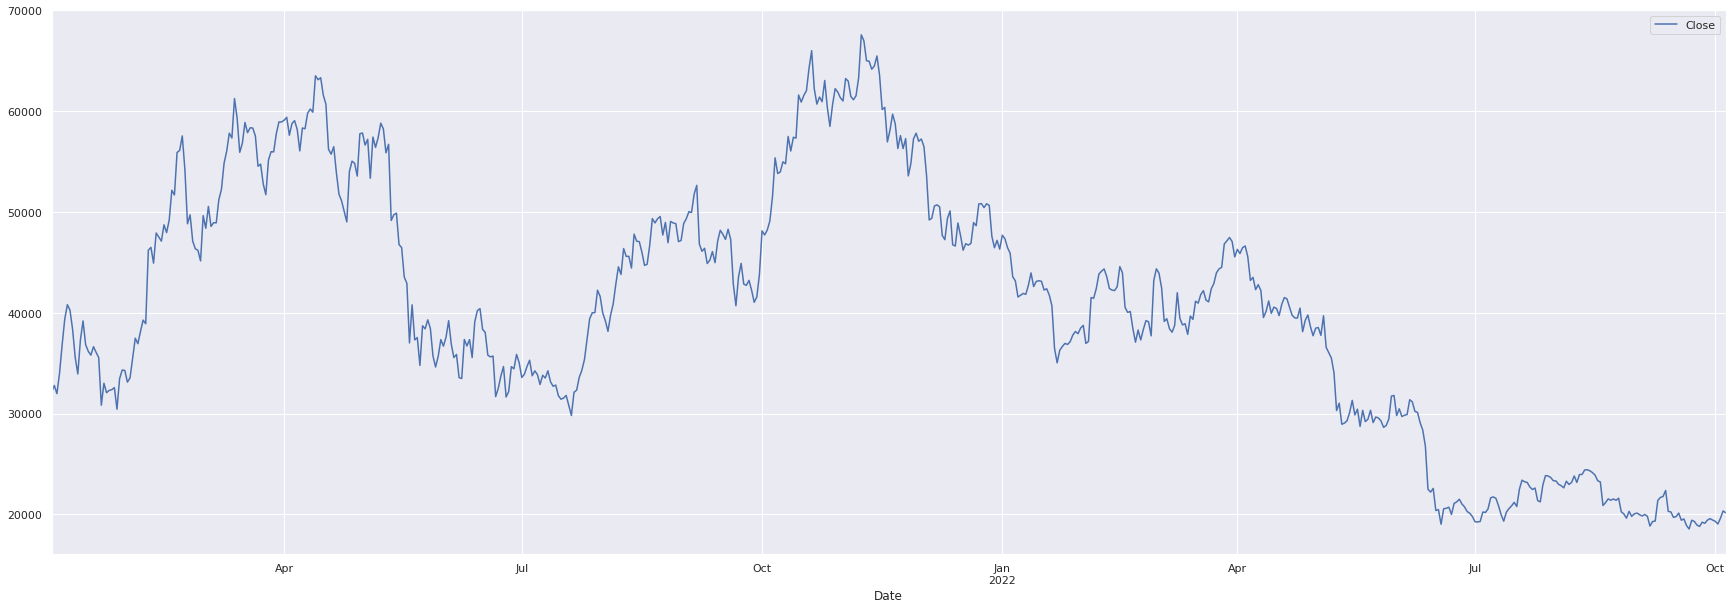

In [7]:
df_btc_usd.plot()

In [8]:
type(df_btc_usd)
type(df_btc_usd.index)
# df_btc_usd.index = df_btc_usd.index.strftime('%Y-%m-%d')
df_btc_usd

pandas.core.frame.DataFrame

pandas.core.indexes.datetimes.DatetimeIndex

,Close
Date,
2021-01-02,32127.267578
2021-01-03,32782.023438
2021-01-04,31971.914062
2021-01-05,33992.429688
2021-01-06,36824.363281
...,...
2022-10-01,19312.095703
2022-10-02,19044.107422
2022-10-03,19623.580078


In [9]:
from gluonts.dataset.common import ListDataset

freq = "1d"
start = pd.Period("02-01-2021", freq=freq)
prediction_length = 10

train_ds = ListDataset(
    [{"start": df_btc_usd.index[0], "target": df_btc_usd.Close[:-prediction_length]}],
    freq=freq
)

test_ds = ListDataset(
    [{"start": df_btc_usd.index[0], "target": df_btc_usd.Close[:]}],
    freq=freq
)


In [10]:
type(train_ds)
train_ds

gluonts.itertools.Map

Map(data=[{'start': Timestamp('2021-01-02 00:00:00', freq='D'), 'target': Date
2021-01-02    32127.267578
2021-01-03    32782.023438
2021-01-04    31971.914062
2021-01-05    33992.429688
2021-01-06    36824.363281
                  ...     
2022-09-21    18547.400391
2022-09-22    19413.550781
2022-09-23    19297.638672
2022-09-24    18937.011719
2022-09-25    18802.097656
Freq: D, Name: Close, Length: 632, dtype: float64}])

100%|██████████| 50/50 [00:01<00:00, 46.63it/s, epoch=5/5, avg_epoch_loss=9.94]


<AxesSubplot:>

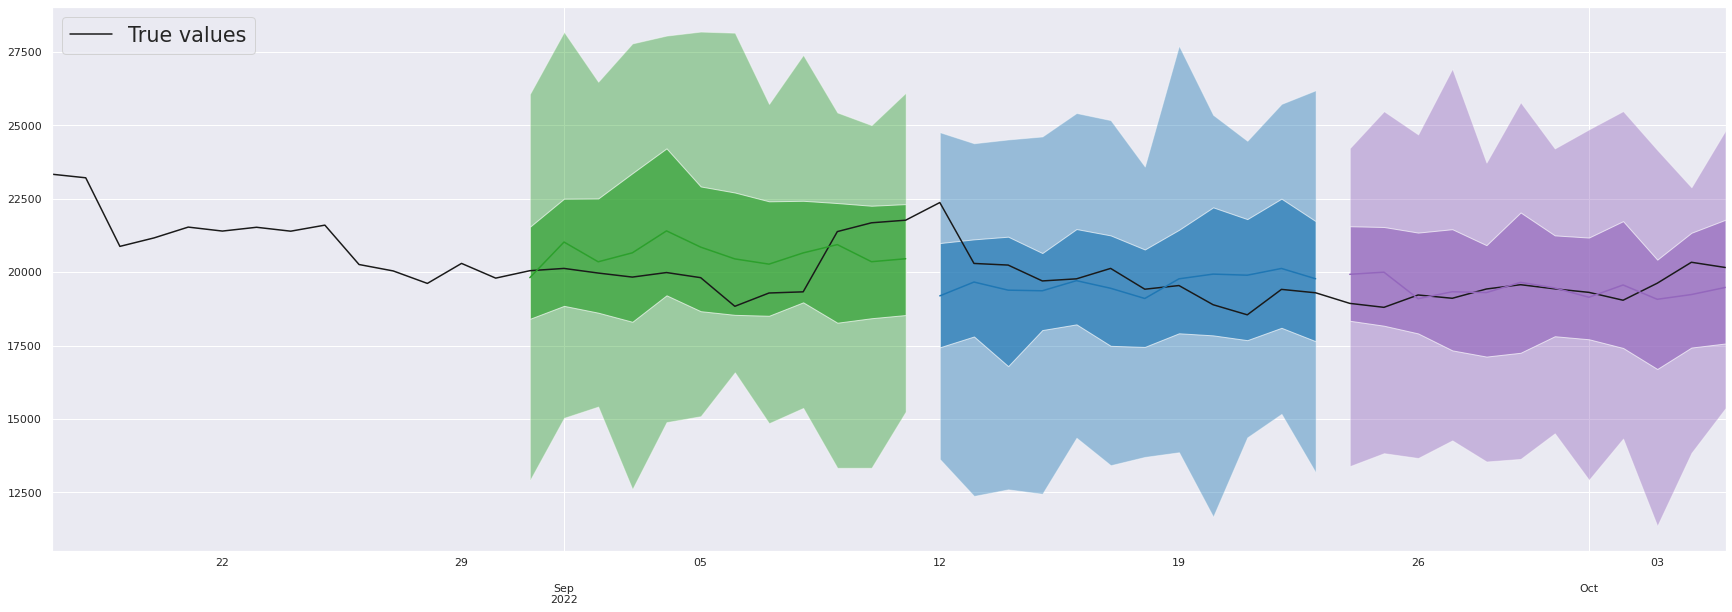

In [11]:
estimator = TransformerEstimator(prediction_length=12, freq=freq, trainer=Trainer(epochs=5))
predictor = estimator.train(training_data=train_ds)

# Make predictions
true_values = to_pandas(list(test_ds)[0])
true_values[-50:].to_timestamp().plot(color="k")

prediction_input = PandasDataset([true_values[:-36], true_values[:-24], true_values[:-12]])
predictions = model.predict(prediction_input)

for color, prediction in zip(["green", "blue", "purple"], predictions):
    prediction.plot(color=f"tab:{color}")

plt.legend(["True values"], loc="upper left", fontsize="xx-large")

In [12]:
from gluonts.evaluation import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

In [13]:
ts_entry = tss[0]
np.array(ts_entry[:5]).reshape(
    -1,
)
dataset_test_entry = next(iter(test_ds))
dataset_test_entry["target"][:5]


array([32127.268, 32782.023, 31971.914, 33992.43 , 36824.363],
      dtype=float32)

array([32127.268, 32782.023, 31971.914, 33992.43 , 36824.363],
      dtype=float32)

In [14]:
forecast_entry = forecasts[0]
print(f"Number of sample paths: {forecast_entry.num_samples}")
print(f"Dimension of samples: {forecast_entry.samples.shape}")
print(f"Start date of the forecast window: {forecast_entry.start_date}")
print(f"Frequency of the time series: {forecast_entry.freq}")

Number of sample paths: 100
Dimension of samples: (100, 12)
Start date of the forecast window: 2022-09-24
Frequency of the time series: <Day>


In [15]:
print(f"Mean of the future window:\n {forecast_entry.mean}")
print(f"0.5-quantile (median) of the future window:\n {forecast_entry.quantile(0.5)}")

Mean of the future window:
 [19655.732 19548.273 19389.318 19414.283 19350.31  19521.78  19542.203
 20403.19  20125.805 20266.09  20295.139 20152.533]
0.5-quantile (median) of the future window:
 [19572.182 19743.113 19503.727 19363.428 19382.314 19609.193 19541.748
 20377.49  19961.307 20457.719 20360.13  20134.701]


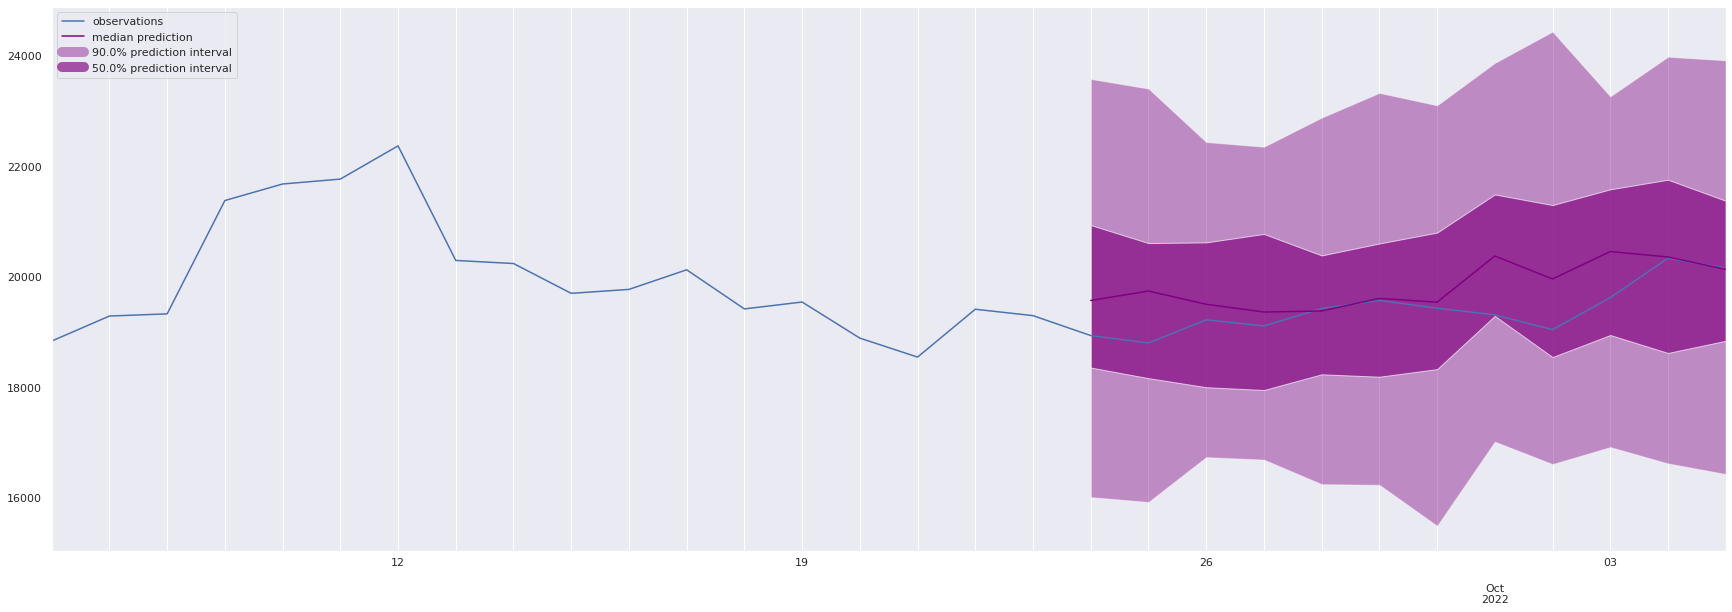

In [16]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 30
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + \
             [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1)
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color="purple")
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()
plot_prob_forecasts(ts_entry, forecast_entry)


In [17]:
from gluonts.evaluation import Evaluator

evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(tss, forecasts)
print(json.dumps(agg_metrics, indent=4))


Running evaluation: 1it [00:00,  2.81it/s]

{
    "MSE": 332430.0833333333,
    "abs_error": 5163.5390625,
    "abs_target_sum": 232978.109375,
    "abs_target_mean": 19414.842447916668,
    "seasonal_error": 1155.968799682035,
    "MASE": 0.37223748771883675,
    "MAPE": 0.022445909678936005,
    "sMAPE": 0.021989141901334126,
    "MSIS": 7.768865741636129,
    "QuantileLoss[0.1]": 5318.960546875001,
    "Coverage[0.1]": 0.0,
    "QuantileLoss[0.5]": 5163.5390625,
    "Coverage[0.5]": 0.8333333333333334,
    "QuantileLoss[0.9]": 7008.216406249998,
    "Coverage[0.9]": 1.0,
    "RMSE": 576.5675011074882,
    "NRMSE": 0.029697253668383872,
    "ND": 0.022163194114468508,
    "wQuantileLoss[0.1]": 0.02283030178733933,
    "wQuantileLoss[0.5]": 0.022163194114468508,
    "wQuantileLoss[0.9]": 0.030081008147291727,
    "mean_absolute_QuantileLoss": 5830.238671874999,
    "mean_wQuantileLoss": 0.025024834683033192,
    "MAE_Coverage": 0.17777777777777778,
    "OWA": NaN
}


In [18]:
df_btc_usd.reset_index().to_csv('btc-usd.csv')

sources :
 <https://ts.gluon.ai/stable/tutorials/forecasting/quick_start_tutorial.html>
 <https://aws.amazon.com/fr/blogs/machine-learning/creating-neural-time-series-models-with-gluon-time-series/>


## BTC-USD Hourly - Bitstamp

In [19]:
btc_usd_h = pd.read_csv("data/Bitstamp_BTCUSD_1h.csv")
btc_usd_h = btc_usd_h.iloc[::-1]
btc_usd_h = btc_usd_h[["date", "close"]]
btc_usd_h.set_index("date", inplace=True)
btc_usd_h.head()
btc_usd_h.shape

,close
date,
2018-05-15 06:00:00,8740.99
2018-05-15 07:00:00,8739.00
2018-05-15 08:00:00,8728.49
2018-05-15 09:00:00,8708.32
2018-05-15 10:00:00,8795.90


(38467, 1)

<AxesSubplot:xlabel='date'>

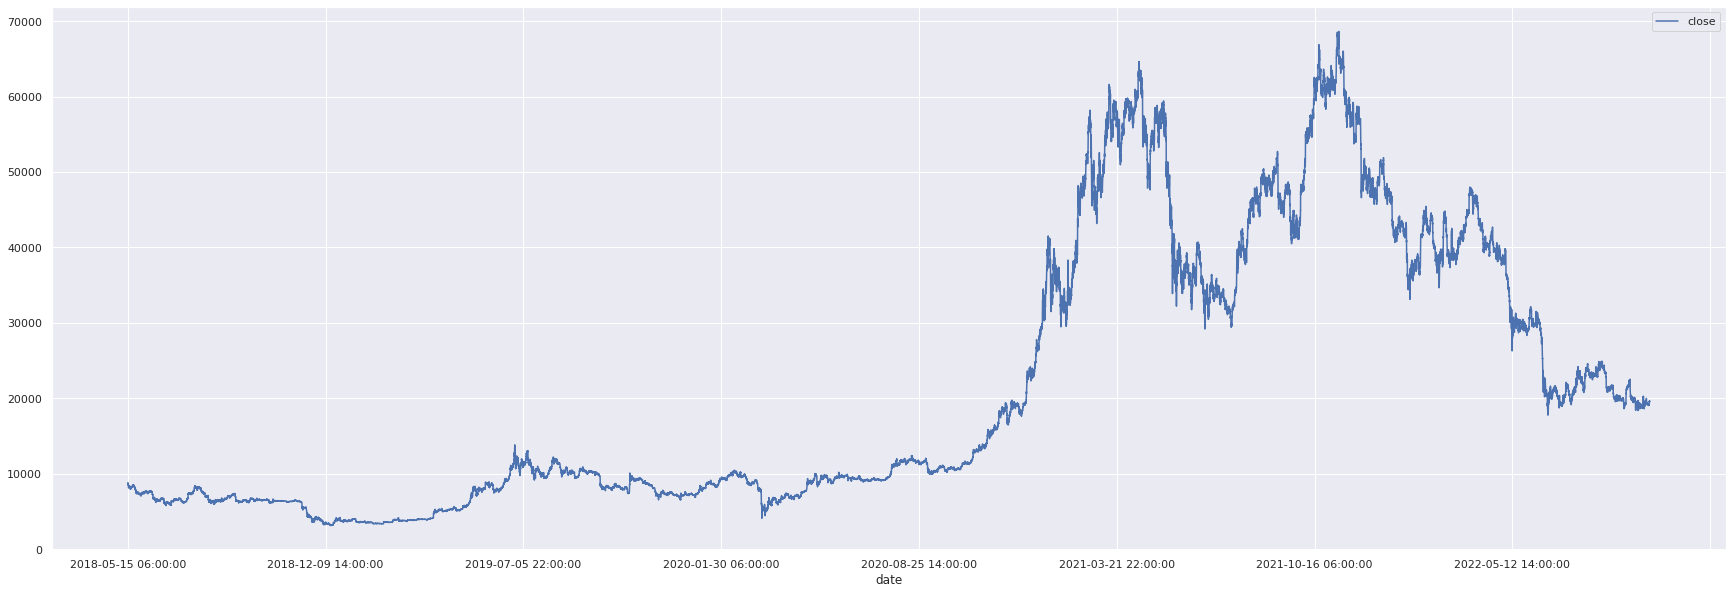

In [20]:
btc_usd_h.plot()

In [21]:
from gluonts.dataset.common import ListDataset

freq = "1h"
start = pd.Period("2021-02-01 00:00:00", freq=freq)
prediction_length = 72

train_ds = ListDataset(
    [{"start": btc_usd_h.index[0], "target": btc_usd_h.close[:-prediction_length]}],
    freq=freq
)

test_ds = ListDataset(
    [{"start": btc_usd_h.index[0], "target": btc_usd_h.close[:]}],
    freq=freq
)

In [22]:
estimator = TransformerEstimator(prediction_length=prediction_length, freq=freq, trainer=Trainer(epochs=5))
predictor = estimator.train(training_data=train_ds)

100%|██████████| 50/50 [00:16<00:00,  3.07it/s, epoch=5/5, avg_epoch_loss=8.45]


<AxesSubplot:>

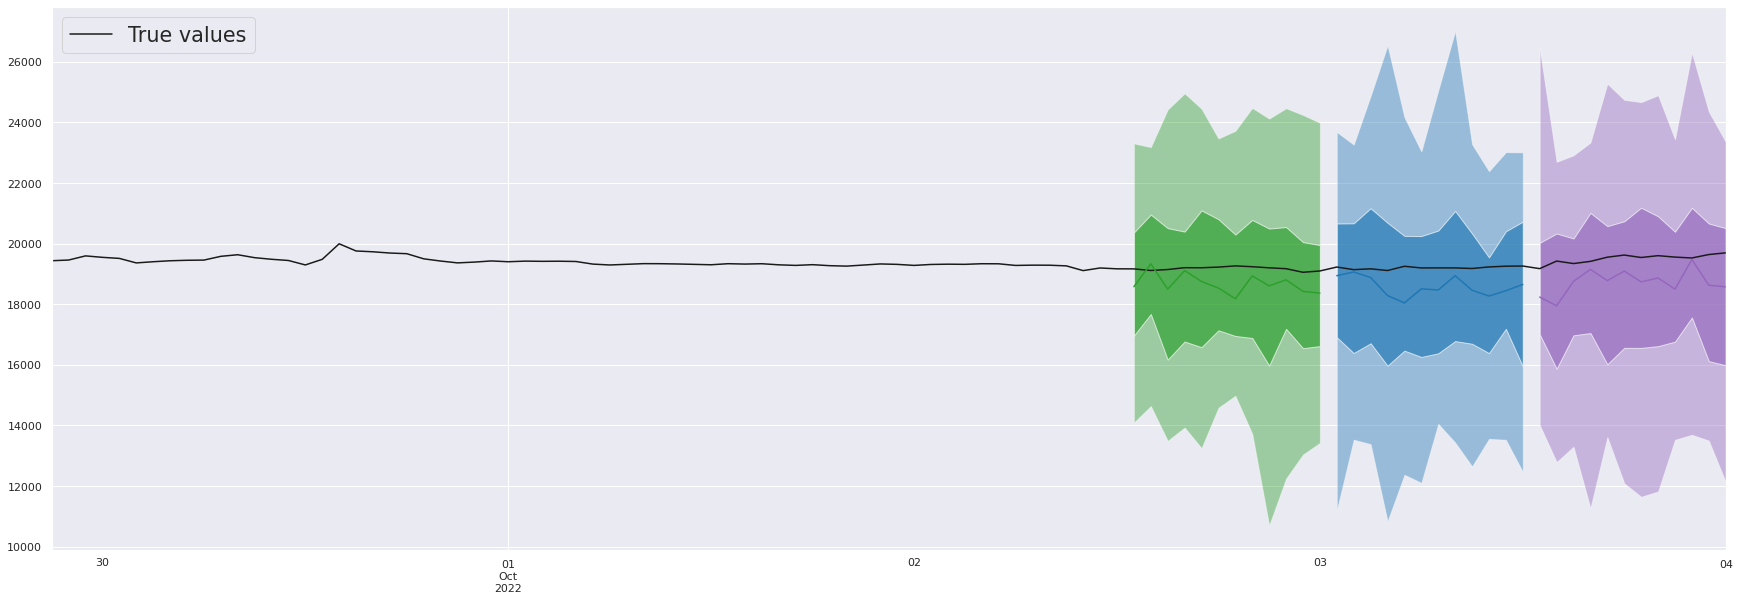

In [23]:

# Make predictions
true_values = to_pandas(list(test_ds)[0])
true_values[-100:].to_timestamp().plot(color="k")

prediction_input = PandasDataset([true_values[:-36], true_values[:-24], true_values[:-12]])
predictions = model.predict(prediction_input)

for color, prediction in zip(["green", "blue", "purple"], predictions):
    prediction.plot(color=f"tab:{color}")

plt.legend(["True values"], loc="upper left", fontsize="xx-large")

In [24]:
from gluonts.evaluation import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

In [25]:
ts_entry = tss[0]
np.array(ts_entry[:5]).reshape(
    -1,
)
dataset_test_entry = next(iter(test_ds))
dataset_test_entry["target"][:5]

array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 ], dtype=float32)

array([8740.99, 8739.  , 8728.49, 8708.32, 8795.9 ], dtype=float32)

In [26]:
forecast_entry = forecasts[0]
print(f"Number of sample paths: {forecast_entry.num_samples}")
print(f"Dimension of samples: {forecast_entry.samples.shape}")
print(f"Start date of the forecast window: {forecast_entry.start_date}")
print(f"Frequency of the time series: {forecast_entry.freq}")
print(f"Mean of the future window:\n {forecast_entry.mean}")
print(f"0.5-quantile (median) of the future window:\n {forecast_entry.quantile(0.5)}")

Number of sample paths: 100
Dimension of samples: (100, 72)
Start date of the forecast window: 2022-10-01 01:00
Frequency of the time series: <Hour>
Mean of the future window:
 [20161.238 20094.316 20544.305 20327.783 20364.57  20547.424 20641.738
 20582.092 20373.914 20628.398 20414.271 20363.623 20505.076 20324.73
 20115.6   20433.953 20216.262 20522.72  20595.834 20312.945 20739.645
 20324.178 20457.898 20377.37  20466.113 20250.42  20511.365 20366.924
 20412.783 20390.992 20335.    20137.484 20491.98  20301.57  20479.215
 20385.139 20204.467 20075.797 20543.68  20445.959 20562.691 20519.744
 20240.055 20609.387 20551.336 20328.975 20537.871 20618.408 20755.322
 20381.777 20454.816 20678.06  20315.377 20469.963 20599.268 20352.75
 20511.896 20585.01  20614.121 20236.008 20392.059 20485.943 20312.062
 20576.123 20288.037 20478.951 20529.4   20580.592 20432.041 20379.158
 20368.754 20523.84 ]
0.5-quantile (median) of the future window:
 [20343.49  20292.885 20538.861 20452.348 20283.1

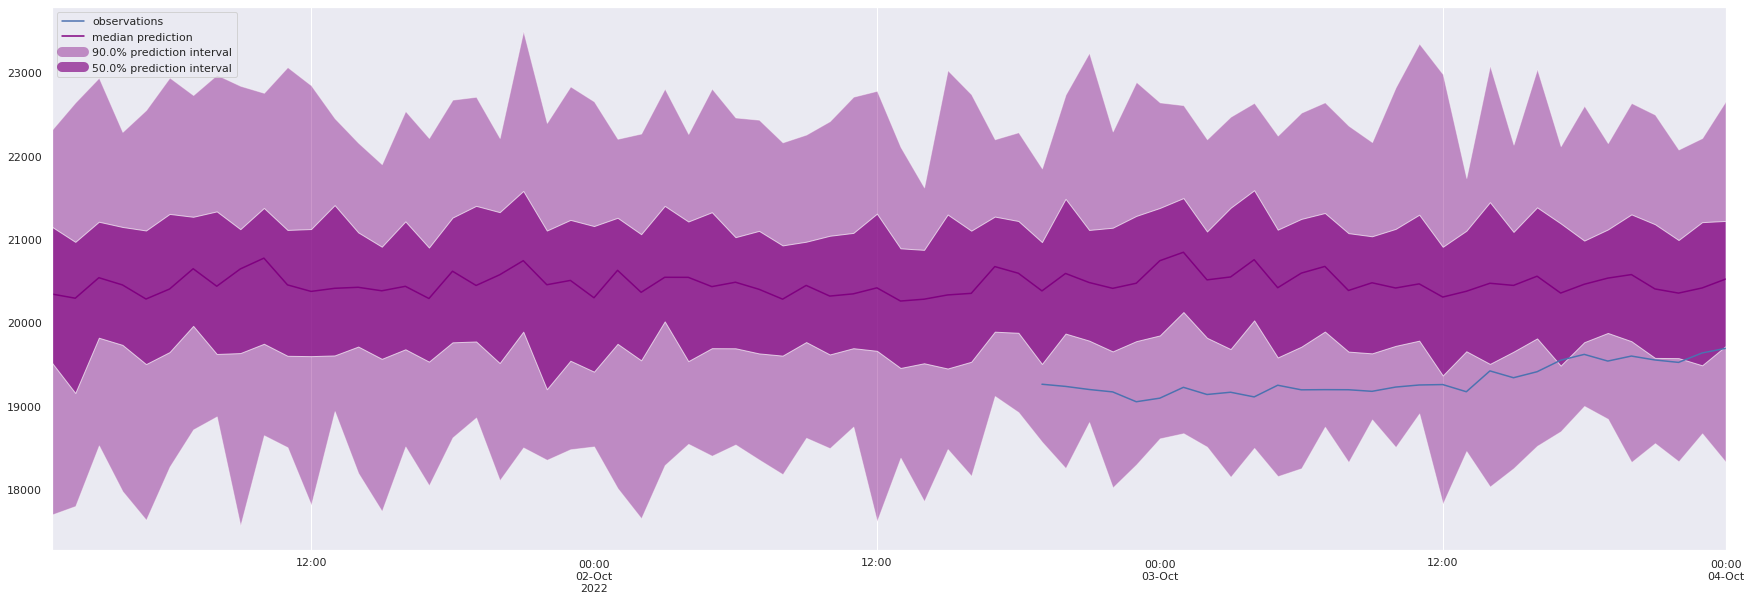

In [27]:

plot_prob_forecasts(ts_entry, forecast_entry)


In [28]:
btc_usd_h.reset_index().to_csv("bitstamp.csv")